In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/HAND/TRAIN'
test_path = '/content/drive/MyDrive/HAND/TEST'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


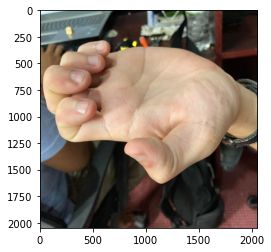

In [ ]:
img = load_img('/content/drive/MyDrive/HAND/TRAIN/HAI/HAI(1).jpg')
plt.imshow(img)

In [ ]:
DATADIR = '/content/drive/MyDrive/HAND'

In [ ]:
cv2.imread('/content/drive/MyDrive/HAND/TRAIN/HAI/HAI(1).jpg').shape

(2048, 2048, 3)

In [ ]:
cv2.imread('/content/anh.jpg').shape

(2048, 1536, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_TRAIN = ImageDataGenerator(rescale=1/255)
X_TEST = ImageDataGenerator(rescale=1/255)

In [ ]:
TRAIN = X_TRAIN.flow_from_directory(directory=r"/content/drive/MyDrive/HAND/TRAIN",target_size=(200, 200),batch_size=9,class_mode="categorical",color_mode="rgb",)
TEST  = X_TEST.flow_from_directory(directory=r"/content/drive/MyDrive/HAND/TEST",target_size=(200, 200),batch_size=9,class_mode="categorical",color_mode="rgb",)

Found 209 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [ ]:
TRAIN.class_indices

{'ANH': 0, 'HAI': 1, 'PHONG': 2}

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(Conv2D(4,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(81,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(243,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(81,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(27,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(9,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 13)      364       
                                                                 
 conv2d_21 (Conv2D)          (None, 200, 200, 4)       472       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 4)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 40000)             0         
                                                                 
 dense_58 (Dense)            (None, 81)                3240081   
                                                                 
 dense_59 (Dense)            (None, 243)               19926     
                                                     

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(TRAIN,epochs=50,batch_size=27,verbose=1,validation_data=TEST)

Epoch 1/50
24/24 [==============================] - 15s 588ms/step - loss: 2.1723 - accuracy: 0.5120 - val_loss: 0.9937 - val_accuracy: 0.6111
Epoch 2/50
24/24 [==============================] - 13s 553ms/step - loss: 0.5891 - accuracy: 0.7416 - val_loss: 0.6638 - val_accuracy: 0.5556
Epoch 3/50
24/24 [==============================] - 13s 523ms/step - loss: 0.2339 - accuracy: 0.9378 - val_loss: 1.3701 - val_accuracy: 0.5556
Epoch 4/50
24/24 [==============================] - 12s 519ms/step - loss: 0.1966 - accuracy: 0.9378 - val_loss: 0.4066 - val_accuracy: 0.8333
Epoch 5/50
24/24 [==============================] - 13s 523ms/step - loss: 0.0904 - accuracy: 0.9904 - val_loss: 0.5067 - val_accuracy: 0.8333
Epoch 6/50
24/24 [==============================] - 12s 518ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.4922 - val_accuracy: 0.8889
Epoch 7/50
24/24 [==============================] - 13s 523ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.5290 - val_accuracy: 0.7778

In [ ]:
model.save('Hand.h5')

In [ ]:
score=model.evaluate(TEST,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])

2/2 [==============================] - 1s 392ms/step - loss: 0.7722 - accuracy: 0.8889
Test loss= 0.7721617221832275
Test accuracy= 0.8888888955116272


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

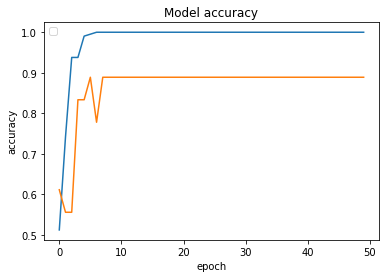

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
Hello_OPENLAB = load_model('/content/Hand.h5')

In [ ]:
labels = {0: 'ANH', 1: 'HAI', 2: 'PHONG'}

This is:  HAI


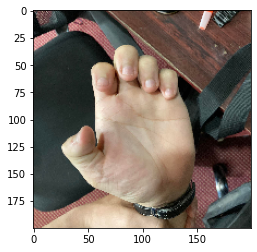

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/HAI.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  ANH


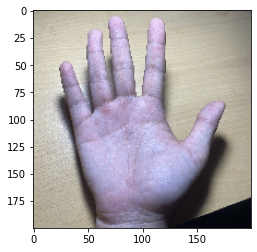

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/ANH.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])